In [1]:
x=1

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/multimil_reproducibility/pipeline/data/reports/best.tsv', sep='\t', index_col=None)
task = 'hlca_healthy_ipf_embed_balanced_final'

In [4]:
runs = {}
yerr = {}
df_task = df[df['task'] == task]
for method in np.unique(df_task['method']):
    runs[method] = eval(df_task.loc[df_task['method'] == method, 'accuracies'].values[0])
    yerr[method] = np.array(runs[method]).std()

df_tmp = df_task[['method', 'accuracy']]
df_tmp.index = df_tmp['method']
df_tmp = df_tmp[['accuracy']].sort_values('accuracy', ascending=False)
df_tmp = df_tmp.T

yerr_sorted = [yerr[method] for method in df_tmp.columns]

In [5]:
df_tmp.columns

Index(['multigrate_mil', 'ct_pb_rf', 'ct_pb_nn', 'freq_rf', 'pb_rf',
       'ct_pb_mr', 'freq_nn', 'pb_mr', 'pb_nn', 'gex_rf', 'freq_mr', 'gex_nn'],
      dtype='object', name='method')

In [6]:
df_tmp = df_tmp[[
    'multigrate_mil', 
    'ct_pb_rf',
    'ct_pb_nn', 
    'ct_pb_mr', 
    'freq_rf',
    'freq_nn',
    'freq_mr', 
    'pb_rf',
    'pb_mr',
    'pb_nn',
    'gex_rf',
    'gex_nn'
]]

In [7]:
sc.set_figure_params(vector_friendly=True, figsize=(6,4))

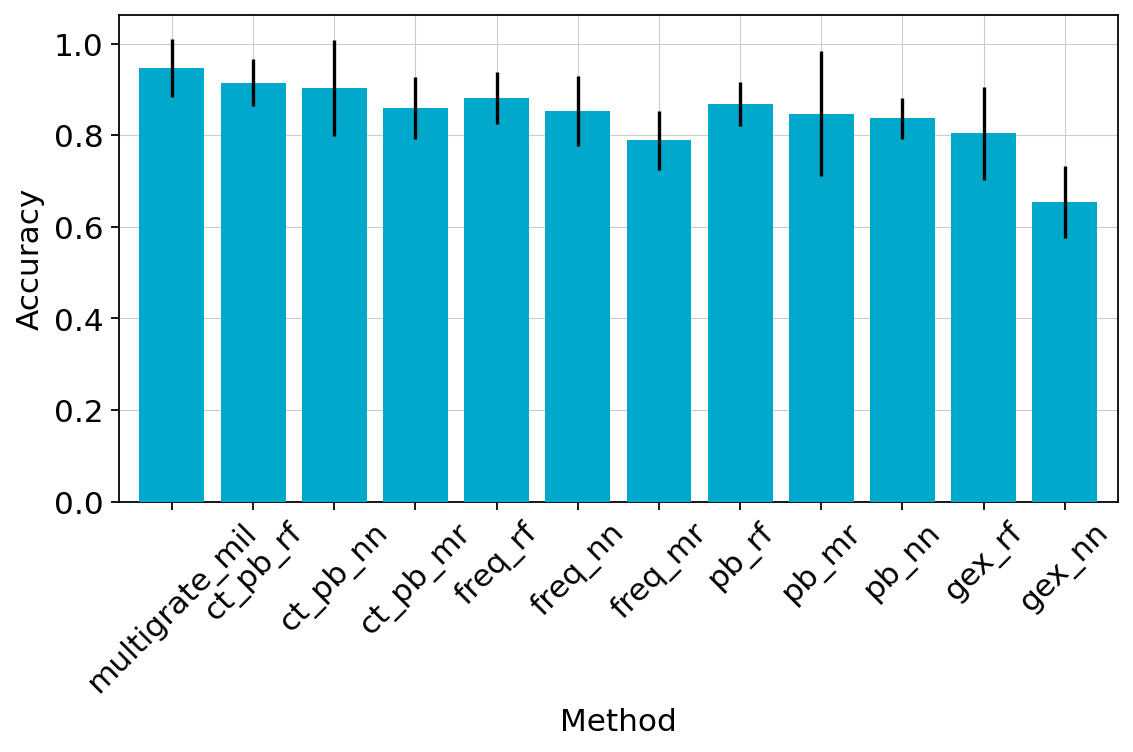

In [8]:
ax = df_tmp.T.plot(kind='bar', zorder=3, figsize=(8, 4), color=["#00a8cc"], rot=45, yerr=yerr_sorted, width=0.8)
ax.get_legend().remove()
ax.grid(zorder=0, linewidth=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('')
plt.savefig('figures/hlca_accuracy.svg', bbox_inches='tight')